## Buffalo Open Data
## The connection between the crime rate in Buffalo public school to their graduation rate. 

By: Andrea Khoury

For my project I have decided to change my project topic a couple times due to lake of promising and credible data sources. Airport data was hard to come by especially for the Buffalo region. Buffalo open data has data based on crime in Buffalo and the school districts here in the city of Buffalo. I want to compare the two for my project. I want to see if the amount of crime committed in a certain area has a connection with the public schools and their graduation rates. 
	
    
The data that is provided from Buffalo Open Data is relevant and trust worthy. If $10 million dollars can be invested into The Buffalo Public School systems, the curriculum will be changed and more effective to the students and the environment that would be created will make the students want to come to school and learn. This does bring up another point for me to look at is their attendance and compare it to a suburb of Buffalo’s school. I can overall look at their attendance, graduation rate and crime to make my conclusions. 


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.set(style="darkgrid")

First data source. Buffalo Crime Open data

In [4]:
data = pd.read_csv('Crime_Incidents.csv')
data = data.rename(columns = {'zip':'ZIP CODE'})
data.head()

C:\Users\Andrea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks
0,834517439,18-0490226,02/18/2018 08:40:00 AM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,400 Block GRANT ST,NaN,BUFFALO,NY,...,POINT (-78.88992082398013 42.92747023459293),8,Sunday,Theft,1.0,5.0,2.0,27.0,176.0,636.0
1,834605904,18-0490729,02/18/2018 08:42:33 AM,UUV,Buffalo Police are investigating this report o...,NaN,200 Block BRECKENRIDGE ST,NaN,BUFFALO,NY,...,POINT (-78.8933407033567 42.91697944628836),8,Sunday,Theft of Vehicle,3.0,5.0,2.0,43.0,110.0,2829.0
2,834508063,18-0490262,02/18/2018 10:10:00 AM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,1100 Block ELMWOOD AV,NaN,BUFFALO,NY,...,POINT (-78.87681855468679 42.928217979853734),10,Sunday,Theft,7.0,5.0,12.0,54.0,193.0,2471.0
3,834601267,18-0490846,02/18/2018 11:20:00 AM,ROBBERY,Buffalo Police are investigating this report o...,NaN,600 Block ELM ST,NaN,BUFFALO,NY,...,POINT (-78.86476379999999 42.8986674),11,Sunday,Robbery,4.0,1.0,14.0,35.0,153.0,2667.0
4,834512110,18-0490444,02/18/2018 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,100 Block ALLEN ST,NaN,BUFFALO,NY,...,POINT (-78.87698161925755 42.89965384438641),12,Sunday,Theft,5.0,1.0,15.0,13.0,141.0,1838.0


In [5]:
data.columns

Index(['incident_id', 'case_number', 'incident_datetime',
       'incident_type_primary', 'incident_description', 'clearance_type',
       'address_1', 'address_2', 'city', 'state', 'ZIP CODE', 'country',
       'latitude', 'longitude', 'created_at', 'updated_at', 'location',
       'hour_of_day', 'day_of_week', 'parent_incident_type',
       'Council Districts', 'Police Districts', 'Zip Codes', 'Tracts',
       'Block Groups', 'Blocks'],
      dtype='object')

In [6]:
data['incident_description']

0         Buffalo Police are investigating this report o...
1         Buffalo Police are investigating this report o...
2         Buffalo Police are investigating this report o...
3         Buffalo Police are investigating this report o...
4         Buffalo Police are investigating this report o...
5                                                       UUV
6                                             LARCENY/THEFT
7                                                  BURGLARY
8                                                      RAPE
9                                                      RAPE
10                                            LARCENY/THEFT
11                                            LARCENY/THEFT
12                                            LARCENY/THEFT
13        Buffalo Police are investigating this report o...
14        Buffalo Police are investigating this report o...
15        Buffalo Police are investigating this report o...
16        Buffalo Police are investigati

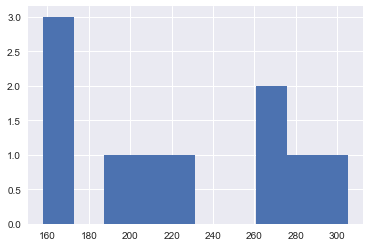

In [7]:
data['ZIP CODE'].value_counts()[:10].hist() # How many crimes were commited in each area code

In [8]:
len(data)

170957

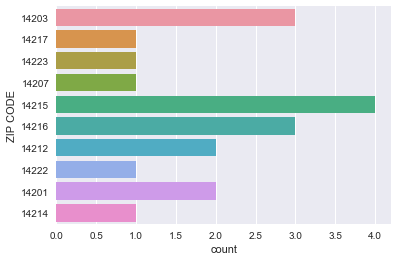

In [9]:
zipc =sns.countplot(y='ZIP CODE',data=data[:400])

In [10]:
df2= data['ZIP CODE'] in range(14210,14230)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Data source number 2. Buffalo Public schools open data

In [11]:
data2 = pd.read_csv('Buffalo_Public_Schools.csv')
data2.head()

,SCHOOL NAME,ID,ALT ID,TYPE,GRADE MIN,GRADE MAX,GRADE LEVEL,START TIME,END TIME,ADDRESS NUMBER,STREET,CITY,STATE,ZIP CODE,PHONE,FAX,LATITUDE,LONGITUDE,LOCATION
0,DYOUVILLE PORTER CAMPUS SCHOOL,PS003,PS3,ELEMENTARY,PK,8,PK-8,03/01/2018 09:00:00 AM,03/01/2018 03:55:00 PM,255,PORTER AVE,BUFFALO,NY,14201,7168163120,7.168887e+09,42.9009,-78.8923,"(42.9009, -78.8923)"
1,BUFFALO ELEMENTARY SCHOOL OF TECHNOLOGY,PS006,PS6,ELEMENTARY,PK,8,PK-8,03/01/2018 08:00:00 AM,03/01/2018 02:55:00 PM,414,SOUTH DIVISION ST,BUFFALO,NY,14204,7168263767,7.168514e+09,42.8807,-78.8610,"(42.8807, -78.861)"
2,EARLY CHILDHOOD CENTER,PS017,PS17,ELEMENTARY,PK,4,PK-4,03/01/2018 09:00:00 AM,03/01/2018 03:55:00 PM,1045,W DELEVAN AVE,BUFFALO,NY,14209,7168163150,7.168887e+09,42.9218,-78.8602,"(42.9218, -78.8602)"
3,DR ANTONIA PANTOJA COMMUNITY SCHOOL OF EXCELLENCE,PS018,PS18,ELEMENTARY,PK,8,PK-8,03/01/2018 09:00:00 AM,03/01/2018 03:55:00 PM,750,WEST AVE,BUFFALO,NY,14215,7168163160,7.168887e+09,42.9110,-78.8969,"(42.911, -78.8969)"
4,NATIVE AMERICAN MAGNET SCHOOL,PS019,PS19,ELEMENTARY,PK,8,PK-8,03/01/2018 08:00:00 AM,03/01/2018 02:55:00 PM,97,W DELAVAN AVE,BUFFALO,NY,14213,7168163180,7.168887e+09,42.9214,-78.8958,"(42.9214, -78.8958)"


In [12]:
data2.columns

Index(['SCHOOL NAME', 'ID', 'ALT ID', 'TYPE', 'GRADE MIN', 'GRADE MAX',
       'GRADE LEVEL', 'START TIME', 'END TIME', 'ADDRESS NUMBER', 'STREET',
       'CITY', 'STATE', 'ZIP CODE', 'PHONE', 'FAX', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [13]:
len(data2['SCHOOL NAME'].value_counts())

63

In [14]:
len(data2)

65

In [15]:
data2['ZIP CODE'].value_counts() # How many schools there are in each zip code

14215    8
14211    8
14213    7
14207    6
14204    6
14214    6
14201    4
14220    4
14216    3
14210    3
14208    3
14206    2
14202    2
14209    2
14212    1
Name: ZIP CODE, dtype: int64

In [16]:
data2['GRADE LEVEL']

0      PK-8
1      PK-8
2      PK-4
3      PK-8
4      PK-8
5      PK-8
6      PK-8
7      PK-8
8      PK-8
9      PK-8
10     PK-8
11     K-12
12     PK-8
13     PK-8
14     PK-8
15     PK-8
16     PK-4
17     PK-2
18      3-8
19     PK-4
20     PK-4
21     PK-4
22      5-8
23     PK-8
24     PK-8
25     PK-8
26     PK-8
27     PK-8
28     PK-8
29     PK-8
      ...  
35     PK-8
36     PK-8
37     PK-8
38     PK-8
39     PK-4
40     9-12
41      7-8
42     5-12
43     5-12
44     5-12
45      5-8
46     9-12
47     6-12
48     6-12
49    11-12
50     9-12
51     9-12
52     9-12
53     9-12
54     9-12
55     9-12
56     9-12
57     9-12
58       12
59     9-12
60     8-12
61     9-10
62     9-12
63     9-10
64     9-12
Name: GRADE LEVEL, Length: 65, dtype: object

In [17]:
alldata = pd.merge(data,data2, on ="ZIP CODE")
alldata.head()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

Third data source. New Yor States Schools and graduation rates. .GOV resourse 2016-2017 school year

In [18]:
data3 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2017.csv')
data3.head()

,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_CODE,AGGREGATION_NAME,LEA_BEDS,LEA_NAME,NRC_CODE,NRC_DESC,COUNTY_CODE,...,REG_ADV_CNT,REG_ADV_PCT,NON_DIPLOMA_CREDENTIAL_CNT,NON_DIPLOMA_CREDENTIAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
0,2016-17,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,66025,32%,3068,1%,6450,3%,1416,1%,20215,10%
1,2016-17,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,35548,35%,1073,1%,2371,2%,546,1%,8252,8%
2,2016-17,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,30477,29%,1995,2%,4079,4%,870,1%,11963,11%
3,2016-17,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,174,14%,31,3%,62,5%,20,2%,189,16%
4,2016-17,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,3958,10%,812,2%,1975,5%,373,1%,5583,15%


In [19]:
data3.columns

Index(['REPORT_SCHOOL_YEAR', 'AGGREGATION_INDEX', 'AGGREGATION_TYPE',
       'AGGREGATION_CODE', 'AGGREGATION_NAME', 'LEA_BEDS', 'LEA_NAME',
       'NRC_CODE', 'NRC_DESC', 'COUNTY_CODE', 'COUNTY_NAME', 'NYC_IND',
       'BOCES_CODE', 'BOCES_NAME', 'MEMBERSHIP_CODE', 'MEMBERSHIP_KEY',
       'MEMBERSHIP_DESC', 'SUBGROUP_CODE', 'SUBGROUP_NAME', 'ENROLL_CNT',
       'GRAD_CNT', 'GRAD_PCT', 'LOCAL_CNT', 'LOCAL_PCT', 'REG_CNT', 'REG_PCT',
       'REG_ADV_CNT', 'REG_ADV_PCT', 'NON_DIPLOMA_CREDENTIAL_CNT',
       'NON_DIPLOMA_CREDENTIAL_PCT', 'STILL_ENR_CNT', 'STILL_ENR_PCT',
       'GED_CNT', 'GED_PCT', 'DROPOUT_CNT', 'DROPOUT_PCT'],
      dtype='object')

In [30]:
data3['COUNTY_NAME']
data3.iloc[15774:17010]

,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,AGGREGATION_TYPE,AGGREGATION_CODE,AGGREGATION_NAME,LEA_BEDS,LEA_NAME,NRC_CODE,NRC_DESC,COUNTY_CODE,...,REG_ADV_CNT,REG_ADV_PCT,NON_DIPLOMA_CREDENTIAL_CNT,NON_DIPLOMA_CREDENTIAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
15774,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,85,7%,33,3%,82,7%,9,1%,323,27%
15775,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,0,0%,0,0%,1,4%,0,0%,8,35%
15776,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,57,5%,28,2%,77,6%,17,1%,276,22%
15777,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,20,5%,10,3%,26,7%,4,1%,126,33%
15778,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,10,5%,0,0%,7,4%,0,0%,63,33%
15779,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,107,20%,9,2%,23,4%,2,0%,99,18%
15780,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,1,4%,0,0%,1,4%,0,0%,10,37%
15781,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,192,10%,0,0%,78,4%,18,1%,433,22%
15782,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,3,1%,47,10%,57,13%,5,1%,149,33%
15783,2016-17,3,District,1.406000e+11,BUFFALO CITY SCHOOL DISTRICT,NaN,NaN,2.0,"Buffalo, Rochester, Yonkers, Syracuse",14.0,...,195,9%,42,2%,107,5%,20,1%,471,22%


#### data3['ENROLL_CNT']

In [22]:
data3['GRAD_CNT']

0         176547
1          89379
2          87168
3            911
4          29395
5          34724
6          17054
7          93115
8           1348
9         157878
10         18669
11        172000
12          4547
13         75476
14        101071
15            54
16        176493
17        175611
18         89117
19         86494
20           861
21         29042
22         35488
23         16786
24         91350
25          2084
26        156260
27         19351
28        172357
29          3254
           ...  
111491        53
111492         2
111493         -
111494        23
111495        32
111496         -
111497        43
111498        20
111499        23
111500         -
111501         -
111502         -
111503        41
111504         2
111505         -
111506        23
111507        20
111508         -
111509        45
111510        20
111511        25
111512         -
111513         -
111514         -
111515        43
111516         2
111517         -
111518        